# Redes Neuronales

Las redes neuronales, mejor conocidas como redes neuronales artificiales, son un modelo cuyo objetivo es imitar el comportamiento de un cerebro humano.

La rama del aprendizaje de máquina a la que pertenecen las redes neuronales es llamado "conexionismo"

El perceptron es la versión mas simple de estas redes. Esta consiste en una neurona que tiene una capa de entrada y un conjunto de conecciones conectando las unidades de entrada con la unidad de salida. La operación básica que realiza la unidad de salida es la suma de los valores de cada entrada multiplicada por su conexión, o "peso" (Wn), el resultado es comparado con un ubral (w0 o "bias") y finalmente pasan por una función para binarizar la salida, da 1 si pasa el humbral o 0 de lo contrario. 

![red.JPG](red.JPG)
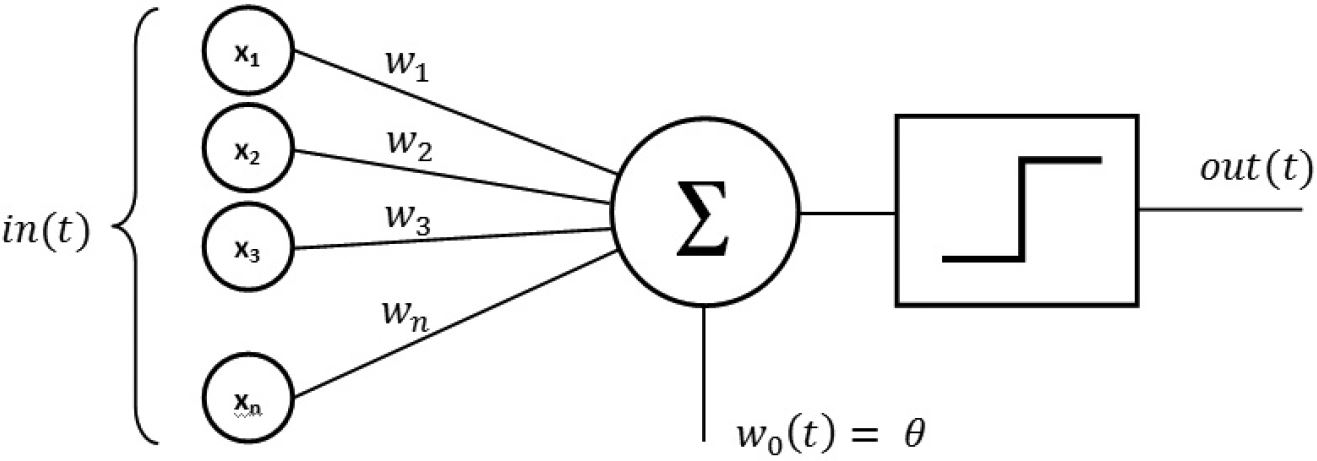

La red neuronal del perceptron solo es capaz de separar los datos mediante la creación de un hiperplano, similar a lo que se vió en las maquinas ve soporte vectorial y a la regresión logística, para poder separar datos que no son linealmente separable es necesario el uso de "capas" y de funciones de activación que creen no linealidades, como lo es la función sigma.

# Construyendo una red neuronal básica

## Definiendo la arquitectura básica

In [2]:
import numpy as np #libreria para el procesamiento de datos con arreglos
from sklearn.datasets import make_moons #libreria para la creación de un dataset que gráficamente se ve 
                                        #como dos medias lunas 
from sklearn.model_selection import train_test_split #libreria para dividir un conjunto de valores en dos, 
                                        #uno para el entrenamiento y otro para la validación de resultados
import matplotlib.pyplot as plt #libreria para graficar

#%matplotlib inline #este comando se usaba para que las graficas de matplotlib se vieran en el notebook, 
                                        #actualmente no es necesario ponerlo. (almenos yo no lo necesité)

In [3]:
def init(inp, out): #Funcion para inicializar los pesos en funcion al numero de neuronas de entrada y 
                    #de salida
    return np.random.randn(inp, out) / np.sqrt(inp) #utiliza una distribución normal para 
                   #generar los numeros aleatorios y la escala por la raiz del numero de neuronas de entrada

def create_architecture(input_layer, first_layer, output_layer, random_seed=0):#Funcion para crear la 
        #arquitectura de la red a partir de los valores de entrada y el numero de neuronas para la primer 
        #capa y la capa de salida además, si se introduce un tercer parámetro se puede cambiar la semilla 
        #de los numeros aleatorios que por default es 0
    np.random.seed(random_seed)#asigna la semilla dada como parámetro para la generación de numeros aleatorios
    layers = X.shape[1], 3 , 1 #el valor resultante es un vector con 3 elementos, el primero corresponde al 
        #numero de columnas de X, el segundo es 3 y el tercero es 1. En mi opinion es un error del autor 
        #el poner el 3 y el 1, lo correcto seria poner "first_layer" y "output_layer" pues estas variables
        #no las está usando en la función, además, 3 y 1 corresponde con el valor usado como parámetro cuando
        #llama a esta función.
    arch = list(zip(layers[:-1], layers[1:])) #Nunca habia visto el uso de la función zip por lo que la 
        #investigué y es muy interesante, sirve para mezclar los datos de dos listas en este caso, 
        #el resultado es [(2,3),(3,1)]
    weights = [init(inp, out) for inp, out in arch] #es un for muy ingenioso, si no lo conociera de antes 
        #me seria dificil explicar como funciona pues en su momento me llevó tiempo entenderlo
        #lo que hace, es recorrer cada tupla del vector arch y manda a llamar la funcion init con los 
        #elementos de cada tupla, al final todo se guarda en un arreglo. En este caso, 
        #primero manda a llamar la funcion init(2,3), y despues la vuelve a llamar pero esta vez con init(3,1)
    return weights #retorna un vector de matrices de pesos.

## Definiendo las funciones principales (para la capa de activación y el cálculo del gradiente)

In [4]:
def sigmoid(z): #Funcion sigmoide, es la misma que se usó en el algoritmo de regresión logística
    return 1/(1 + np.exp(-z))

def sigmoid_prime(s): #esto corresponde a la derivada de la función sigmoide
    return s * (1 -s)

# Demostración de la derivada de la función sigmoide

$$y=\frac{1}{1+e^{-z}}$$

$$\frac{dy}{dz}=\frac{-e^{-z}\bullet\left(-1\right)}{\left(1+e^{-z}\right)^2}=\frac{e^{-z}}{\left(1+e^{-z}\right)^2}=\frac{-1+1+e^{-z}}{\left(1+e^{-z}\right)^2}=\frac{-1}{\left(1+e^{-z}\right)^2}+\frac{1+e^{-z}}{\left(1+e^{-z}\right)^2}$$

$$=\frac{-1}{\left(1+e^{-z}\right)^2}+\frac{1}{1+e^{-z}}=-y^2+y=y(1-y)$$

In [5]:
def feed_forward(X, weights): #Función para hacer la progracación hacia delante, 
                            #se usa tanto para la clasificación de un punto como para el entrenamiento.
    a = X.copy() #para evitar modificar el vector X, crea una copia de este
    out = list() #crea una lista vacia
    for W in weights: #for que recorre cada uno de los pesos, hay que recordar que los pesos 
                        #es un arreglo de matrices
        z = np.dot(a, W) #calcula el producto punto entre el vector de entrada x y el primer elemento 
                        #de la matriz de pesos.
        a = sigmoid(z) #aplica la función de activación a la capa en cuestion. En este ejemplo 
                        #siempre se usa la función sigmoide, pero sin mucho problema se podria editar 
                        #para aplicar distintas funciones de activación en cada capa de la red.
        out.append(a) #agrega al la lista a el valor resultante
    return out #retorna la lista con los valores de salida de cada capa.

In [6]:
def accuracy(true_label, predicted): #Calcula la eficacia del algoritmo, es la relación de aciertos/total.
    correct_preds = np.ravel(predicted)==true_label #en vez de usar un for, realiza una sola operación
        #aprovechando la versatilidad de numpy con el trato de arreglos para genera run arreglo de valores 
        #binarios donde asigna 1 para los aciertos y 0 para los erroneos
    return np.sum(correct_preds) / len(true_label) #suma el numero de aciertos y lo divide entre el total

In [7]:
def back_propagation(l1, l2, weights, y): #esta función se encarga de obtener las deltas por cada capa, 
            #las deltas se ocupan para corregir el error en la función de update weights
            #el calculo de las deltas corresponde al gradiente. Comienza de las ultimas capas y 
            #se va hacia las primeras, por eso es "back propagation"
    l2_error = y.reshape(-1, 1) - l2 #calcula el error de la ultima capa y lo guarda, este se retorna
            #al final para mostrar el error en el entrenamiento
    l2_delta = l2_error * sigmoid_prime(l2) #calcula la delta (gradiente) para la segunda capa usando la
            #derivada de la función sigmoide y el error
    l1_error = l2_delta.dot(weights[1].T) #calcula el error de la primera capa
    l1_delta = l1_error * sigmoid_prime(l1) #calcula el gradiente para la primera capa
    return l2_error, l1_delta, l2_delta #retorna el error de la segunda capa y los gradientes.

def update_weights(X, l1, l1_delta, l2_delta, weights, alpha=1.0): #Esta funcion con ayuda de las deltas 
            #que retorna "backpropagation" actualiza los pesos
    weights[1] = weights[1] + (alpha * l1.T.dot(l2_delta)) #Actualización de los pesos de la segunda capa 
            #haciendo el producto punto con el gradiente y escalandolo con el valor de alpha
    weights[0] = weights[0] + (alpha * X.T.dot(l1_delta)) #Actualización de los pesos de la primera capa
    return weights #retorna el vector de pesos

In [8]:
def predict(X, weights): #predice el valor de X utilizando el vector de matrices de pesos
    _, l2 = feed_forward(X, weights) #para la red que utiliza este ejemplo, feedforward retorna dos valoes 
            #debido a las dos capas de neuronas que tiene, sin embargo, el primer valor no es de interes 
            #en la predicción, por esto pone un guión bajo.
    preds = np.ravel((l2 > 0.5).astype(int)) #al evaluar la condición se vuelve un booleano, 
            #pero con el final de "astype int" lo convierte a entero. Finalmente, la funcion de ravel 
            #en caso de la salida sea una matriz, la vuelve un arreglo de dimension 1-N
    return preds #retorna el vector de predicciones

## Resolviendo un problema simple

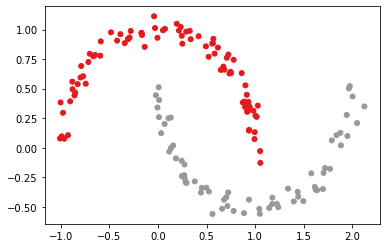

In [9]:
np.random.seed(0) #Usa una semilla para la generación de numeros aleatorios y asegurarse de que sean 
                #los mismo numeros aleatorios cuando se vuelve a correr el código

coord, cl = make_moons(300, noise=0.05) #Utiliza la función de make moons de la libreria sklearn, 
        #para tener un dataset de elementos que forman dos lunas esta función retorna una matriz con 
        #las coordenadas y un arreglo con las etiquetas 
X, Xt, y, yt = train_test_split(coord, cl, test_size=0.50, random_state=0) #Esta función permite separar 
        #aleatoriamente el dataset en un conjunto de entrenamiento y otro de validación segun el 
        #porcentaje dado en la variable test_size. Finalmente, se le puede asignar una semilla para 
        #tener más control con la aleatoreidad ya que usando la misma semilla nos aseguramos de que 
        #siempre tendremos la misma división de datos cuando volvemos a correr el código.
plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap=plt.cm.Set1) #La función scatter grafica los puntos, 
        #en este caso solo grafica los que se usan en el entrenamiento. Se puede ver que a comparación a 
        #como lo hace el autor de Machine Learning in Action, esta manera de graficar es mucho más rápida
        #puede ser por ingenio del autor o por los avances en las librerias pues este código es más reciente.
plt.show() #comando para imprimir la gráfica en pantalla.

In [10]:
weights = create_architecture(X, 3, 1) #obtiene el vector de matrices de pesos definiendo la arquitectura, 
        #el 3 corresponde a la capa intermedia y el 1 a la capa de salida el numero de neuronas de la capa 
        #de salida depende del numero de clases a identificar, siendo 2^n, es decir, con una neurona se 
        #pueden identificar 2 clases.

In [11]:
for j in range(30000 + 1): #for que realiza el entrenamiento de la red, realiza 30000 epocas, el +1 
            #es porque la función range no llega al ultimo elemento, solo hasta el interior inmediato
    l1, l2 = feed_forward(X, weights) #realiza la alimentación hacia delante y obtiene el error de salida 
                                    #de cada capa 
    l2_error, l1_delta, l2_delta = back_propagation(l1, l2, weights, y) # Ahora, realiza el back propagation
    weights = update_weights(X, l1, l1_delta, l2_delta, weights, alpha=0.05) #aqui actualiza los pesos
    if (j % 5000) == 0: #Cada 5000 epocas reporta los resultados
        train_error = np.mean(np.abs(l2_error)) #calcula el promedio del error de la ultima capa 
                                        #para imprimirlo
        print('Epoca {:5}'.format(j), end=' - ') #imprime el numero de epocas
        print('error: {:0.4f}'.format(train_error), end= ' - ') #imprime el rror con 4 decimales
        train_accuracy = accuracy(true_label=y, predicted=(l2 > 0.5)) # obtiene el accuracy (eficacia) con 
                #los datos de entrenamiento
        test_preds = predict(Xt, weights) #Obtiene los valores de predicción para el conjunto de datos 
                #de validación
        test_accuracy = accuracy(true_label=yt, predicted=test_preds) #Obtiene el accuracy para los 
                #datos de validación
        print('acc: train {:0.3f}'.format(train_accuracy), end= ' | ') #Imprime el accuracy de entrenamiento
        print('test {:0.3f}'.format(test_accuracy)) #Imprime el accuracy de validación
  

Epoca     0 - error: 0.5137 - acc: train 0.433 | test 0.673
Epoca  5000 - error: 0.1133 - acc: train 0.947 | test 0.960
Epoca 10000 - error: 0.0988 - acc: train 0.960 | test 0.960
Epoca 15000 - error: 0.0917 - acc: train 0.960 | test 0.960
Epoca 20000 - error: 0.0865 - acc: train 0.953 | test 0.960
Epoca 25000 - error: 0.0830 - acc: train 0.953 | test 0.960
Epoca 30000 - error: 0.0804 - acc: train 0.953 | test 0.960
